## Python Plotting: The Basics
This Jupyter Notebook will go over some basic plotting tools that Python has to offer. The two most important libraries needed to plot your own data is [matplotlib](https://matplotlib.org/) and [Cartopy](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html).

### Import Libraries

In [1]:
# NumPy is a library for Python that adds support for large, multi-dimensional arrays and matrices,
# along with a large collection of high-level mathematical functions to operate on these arrays.
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

### The Most Basic Line Plot
If you want the most basic plot, as long as you have data that is of the same size, below is all you need:

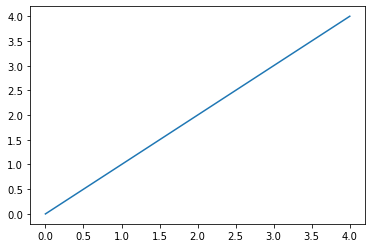

In [2]:
x = [0, 1, 2, 3, 4]
y = [0, 1, 2, 3, 4]

plt.plot(x, y)

#### Adjust line features
Changing how the line appears on the plot is done within the `plt.plot()` command:

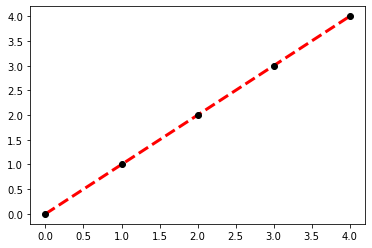

In [3]:
plt.plot(x, y, color='red', marker='o', 
         markerfacecolor='black', markeredgecolor='black',
         linestyle='--', linewidth=3)

#### Add some plot features
Above is perfect for something quick and dirty if you want to just look. Let's make this plot ready to present:

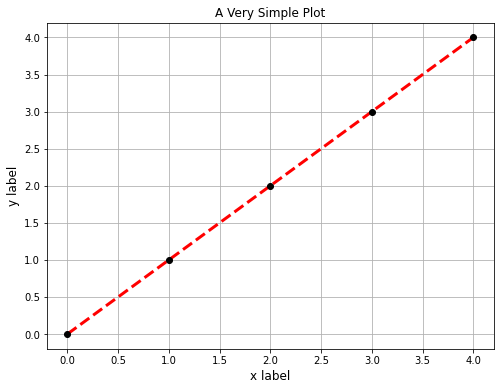

In [4]:
# Create figure object and set figure size
fig = plt.figure(figsize=(8,6))

# Plot data
plt.plot(x, y, color='red', marker='o', 
         markerfacecolor='black', markeredgecolor='black',
         linestyle='--', linewidth=3)

# Add x and y label
plt.xlabel('x label', fontsize=12)
plt.ylabel('y label', fontsize=12)

# Add title
plt.title('A Very Simple Plot')

# Add a grid to plot
plt.grid()

#### Add additional data
Adding additional data to an existing plot is very simple. The data does not have to be the same size as the orginal data, but the new x and y data needs to be the same size.

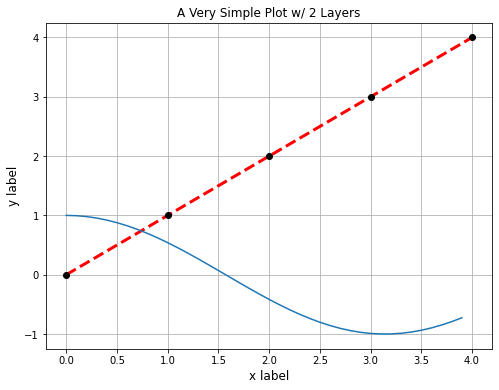

In [5]:
x2 = np.arange(0, 4, .1)
y2 = np.cos(x2)

# Create figure object and set figure size
fig = plt.figure(figsize=(8,6))

# Plot data
plt.plot(x, y, color='red', marker='o', 
         markerfacecolor='black', markeredgecolor='black',
         linestyle='--', linewidth=3)

# Add new data
plt.plot(x2, y2)

# Add x and y label
plt.xlabel('x label', fontsize=12)
plt.ylabel('y label', fontsize=12)
# Add title
plt.title('A Very Simple Plot w/ 2 Layers')
# Add a grid to plot
plt.grid()

#### Add legend

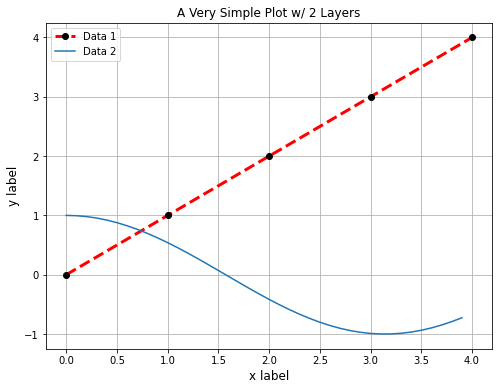

In [6]:
x2 = np.arange(0, 4, .1)
y2 = np.cos(x2)

# Create figure object and set figure size
fig = plt.figure(figsize=(8,6))

# Plot data
plt.plot(x, y, color='red', marker='o', 
         markerfacecolor='black', markeredgecolor='black',
         linestyle='--', linewidth=3, label='Data 1') # add label name

# Add new data
plt.plot(x2, y2, label='Data 2') # add label name

# Add x and y label
plt.xlabel('x label', fontsize=12)
plt.ylabel('y label', fontsize=12)
# Add title
plt.title('A Very Simple Plot w/ 2 Layers')
# Add a grid to plot
plt.grid()

# Add legend
plt.legend()

### Other Plot Types
Below are a few useful plot types. Matplotlib has many more plot types that can be found on their website as well as this [cheatsheet](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png).

#### Scatter Plot

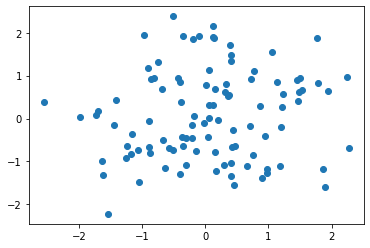

In [7]:
# Generate random test data
rng = np.random.RandomState(0)
x1 = rng.randn(100)
y1 = rng.randn(100)

plt.scatter(x1, y1)

#### Histogram

(array([  3.,   7.,  22.,  66.,  92., 104.,  79.,  33.,  23.,   8.]),
 array([ 53.97227769,  62.50492785,  71.03757801,  79.57022817,
         88.10287833,  96.63552849, 105.16817865, 113.70082881,
        122.23347897, 130.76612913, 139.29877929]),
 <BarContainer object of 10 artists>)

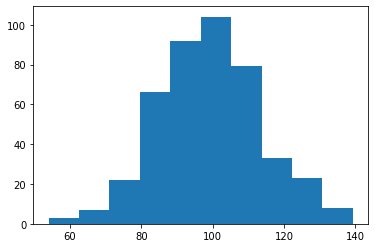

In [8]:
# Generate random histogram data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
data = mu + sigma * np.random.randn(437)

plt.hist(data)

#### Bar Plot

([<matplotlib.axis.XTick at 0x7fa29c212110>,
 [Text(0, 0, 'a'),
  Text(1, 0, 'b'),
  Text(2, 0, 'c'),
  Text(3, 0, 'd'),
  Text(4, 0, 'e'),
  Text(5, 0, 'f')])

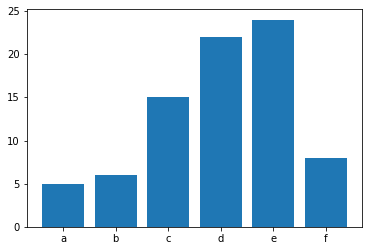

In [9]:
# Generate bar plot data
labels = ['a', 'b', 'c', 'd', 'e', 'f']
heights = [5, 6, 15, 22, 24, 8]

x_pos = [i for i, _ in enumerate(labels)]

plt.bar(x_pos, heights)
plt.xticks(x_pos, labels)

### Subplots
Subplots are useful, especially when comparing two data sets side by side. It is a slightly different approach, but everything else stays relatively the same. It's also important to note that this can be done in several ways, this is just one way it can be done.

Text(0.5, 0.98, 'Plotting with Subplots')

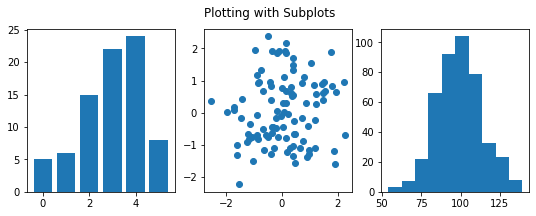

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].bar(x_pos, heights)
axs[1].scatter(x1, y1)
axs[2].hist(data)
fig.suptitle('Plotting with Subplots')

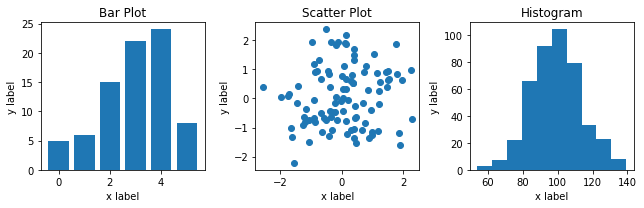

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].bar(x_pos, heights)
axs[1].scatter(x1, y1)
axs[2].hist(data)

# Add labels to 1st subplot
axs[0].set_title('Bar Plot')
axs[0].set_xlabel('x label')
axs[0].set_ylabel('y label')

# Add labels to 2nd subplot
axs[1].set_title('Scatter Plot')
axs[1].set_xlabel('x label')
axs[1].set_ylabel('y label')

# Add labels to 3rd subplot
axs[2].set_title('Histogram')
axs[2].set_xlabel('x label')
axs[2].set_ylabel('y label')

# Automatically adjusts subplot params so that the subplot(s)
# fit in the figure area
fig.tight_layout()

## Spatial Plots
Often, we want to see what our data looks like plotted on a map. Cartopy is the library that you would use to do so.

#### Grab data

In [12]:
import sys
sys.path.append('/scratch1/NCEPDEV/da/Kevin.Dougherty/PyGSI/')
from pyGSI.diags import Conventional

diag = Conventional('/scratch2/NCEPDEV/stmp1/Kevin.Dougherty/ncDiags/gdas.20200920/00/atmos/diag_conv_t_ges.2020092000.nc4')

df = diag.get_data()
latitude = df['latitude'].to_numpy()
longitude = df['longitude'].to_numpy()
observation = df['observation'].to_numpy()

#### Plot data with Cartopy

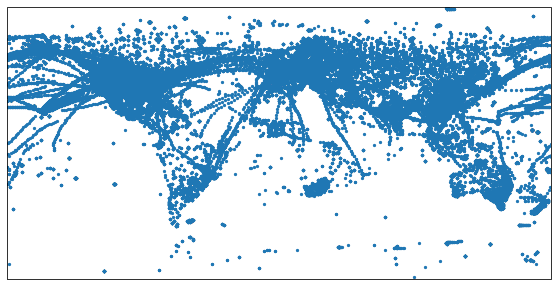

In [13]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.scatter(longitude, latitude, s=5, transform=ccrs.PlateCarree())

#### Add map features
As you can see above, we can see an outline of countries and continents because we have so much data. Let's now add map features to the figure.

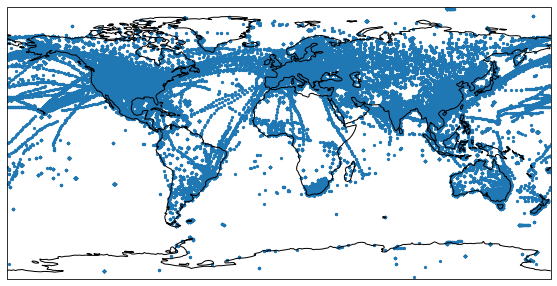

In [14]:
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.scatter(longitude, latitude, s=5, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

#### Change Extent
Let's change the domain we are looking at to CONUS and add state boundaries.

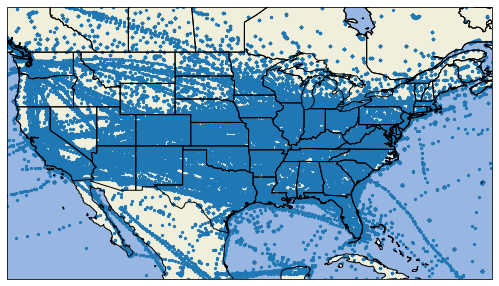

In [15]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent of the domain
ax.set_extent((-125.5, -63.5, 20, 51))

ax.scatter(longitude, latitude, s=5, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)


#### Add Labels

Text(0, 0.5, 'Latitude')

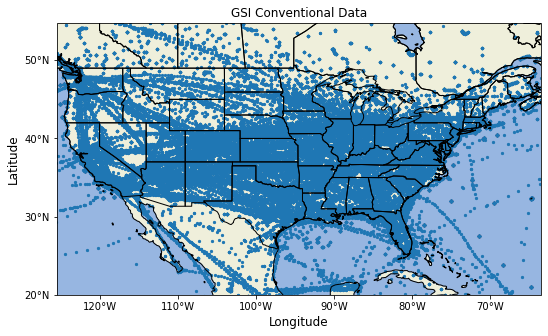

In [18]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent of the domain
ax.set_extent((-125.5, -63.5, 20, 51))

# Set x and y ticks to be latitude and longitude
ax.set_xticks(np.arange(-120, -60, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(20, 60, 10), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot data
ax.scatter(longitude, latitude, s=5, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Add labels
plt.title("GSI Conventional Data")
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

#### Plot observations with a colormap
Above is only plotting the locations of the conventional data, so lets plot the observations with a colorbar

Text(0, 0.5, 'Latitude')

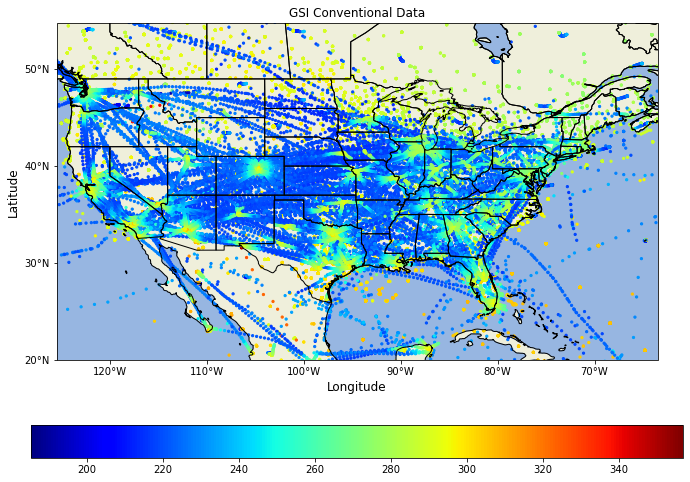

In [19]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Set the extent of the domain
ax.set_extent((-125.5, -63.5, 20, 51))

# Set x and y ticks to be latitude and longitude
ax.set_xticks(np.arange(-120, -60, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(20, 60, 10), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot data
cs = ax.scatter(longitude, latitude, c=observation, s=5,
                cmap='jet', transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Add colorbar
plt.colorbar(cs, fraction=0.075, orientation='horizontal')

# Add labels
plt.title("GSI Conventional Data")
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

## EMCPy and EVA
Above are all pretty basic examples and are good for making quick and dirty plots. EMCPy (see Github [here](https://github.com/NOAA-EMC/emcpy)) has been developed to handle all the heavy lifting for several different plot types leveraging Object Oriented Programming so that you don't have to! It uses a declarative approach where you can input the way you would like your plot to look and outputs that plot with much less lines of code.

EVA (see Github [here](https://github.com/JCSDA-internal/eva)) uses EMCPy's plotting routine to provide diagnostics that can be used to assess the performance of a JEDI-based data assimilation system.
EVA is designed with a completely flexible API that allows diagnostics to be run in a standalone mode, within a workflow system and through, for example, Jupyter notebooks. There are several entry points, depending on what the user is interested in looking at.

The beauty of EVA is that users do not need any Python experience as everything can be set up through a YAML! Let's take a look at a current example YAML that can be found on the Github page [here](https://github.com/JCSDA-internal/eva/blob/develop/src/eva/tests/config/testIodaObsSpaceAircraft.yaml).

### testIodaObsSpaceAircraft.yaml
The YAML's are designed to be separated into three sections:
* data
* transforms
* graphics


#### Data
The first part the yaml shown below is data section. Here, we tell EVA the type of data we would like to evaluate. We outline important aspects like the data type, filename, groups, and variables. In this example, we are grabbing air temperature and eastward wind observation values, as well as GSI H(x) data, IODA h(x) data, Effective QC information, and metadata from an IODA aircraft netCDF4 file.

```
diagnostics:

  # Data read
  # ---------
- data:
    type: IodaObsSpace
    datasets:
      - name: experiment
        filenames:
          - ${data_input_path}/aircraft.hofx.2020-12-14T21:00:00Z.nc4
        groups:
          - name: ObsValue
            variables: &variables [air_temperature, eastward_wind]
          - name: GsiHofXBc
          #- name: GsiEffectiveQC
          - name: hofx
          - name: EffectiveQC
          - name: MetaData
```

#### Transforms
The second section in this yaml is the transforms. Here, we can create new variables by performing arithmetic of existing variables as well as filter the data based on a given input.

The first example below creates a new variable within the dataset called `experiment::HofxMinusGsiHofXBc::${variable}`. This is created by subtracting `experiment::hofx::${variable}` by `experiment::GsiHofXBc::${variable}` while looping through all the variable types (i.e air_temperature and eastward_wind in this scenario).

The second example creates a new variable within the dataset called `experiment::hofxPassedQc::${variable}` that only includes data if the variable `experiment::EffectiveQC::${variable}` is equal to zero. The `accept where` command acts like a filter given a specific condition.


```
  transforms:
        
    # Generate hofx difference
    - transform: arithmetic
      new name: experiment::HofxMinusGsiHofXBc::${variable}
      equals: experiment::hofx::${variable}-experiment::GsiHofXBc::${variable}
      for:
        variable: *variables

    # Generate hofx that passed QC for JEDI
    - transform: accept where
      new name: experiment::hofxPassedQc::${variable}
      starting field: experiment::hofx::${variable}
      where:
        - experiment::EffectiveQC::${variable} == 0
      for:
        variable: *variables
```

#### Graphics
This section is where we define the types of plots we would like to output. As mentioned earlier, this is where we can define exactly how we want our plot to look.

The example below creates a scatter plot comparing JEDI h(x) vs Observations. On the figure level, we define the layout, title, and output name. On the plot level, we add information such as x and y labels, grids, legends, and the data layers to use. For this particular figure, we are adding to separate data layers: the first being h(x) vs. observation for all data, the second being the same, but for those that passed QC.


```
  graphics:

    # Observation correlation scatter plots
    # -------------------------------------

    # JEDI h(x) vs Observations
    - batch figure:
        variables: *variables
      figure:
        layout: [1,1]
        title: 'Observations vs. JEDI h(x) | Aircraft | ${variable_title}'
        output name: observation_scatter_plots/aircraft/${variable}/jedi_hofx_vs_obs_aircraft_${variable}.png
      plots:
        - add_xlabel: 'Observation Value'
          add_ylabel: 'JEDI h(x)'
          add_grid:
          add_legend:
            loc: 'upper left'
          layers:
          - type: Scatter
            x:
              variable: experiment::ObsValue::${variable}
            y:
              variable: experiment::hofx::${variable}
            markersize: 5
            color: 'black'
            label: 'JEDI h(x) versus obs (all obs)'
          - type: Scatter
            x:
              variable: experiment::ObsValue::${variable}
            y:
              variable: experiment::hofxPassedQc::${variable}
            markersize: 5
            color: 'red'
            label: 'JEDI h(x) versus obs (passed QC in JEDI)'
```